In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.sample(5)

,Age,EstimatedSalary,Purchased
179,31,34000,0
86,24,55000,0
352,42,90000,1
284,48,141000,0
174,34,72000,0


## Train_Test_Split

### It is always recommended to Train_Test_Split before feature scaling whether it is Normalization or Standardization

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop("Purchased" , axis = 1) , df["Purchased"] , test_size = 0.3, random_state = 0)

In [8]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler for learning the parameters and caluclating the mean for both the columns
scaler.fit(X_train)

#transform the X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

### 3.78642857e+01-> Age (mean)
### 6.98071429e+04-> Salary(mean)

## The problem with the standardscaler is that it takes the pandas dataframe as an input but return the feature in the form of numpy array

In [12]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


### X_train is a pandas dataframe.

In [13]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

### X_train_scaled is a numpy array.

### For overcoming this probelm we convert this array into pandas dataframe by below code

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [15]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### Here we can see that before scaling the mean of age and salary columns is 37.9 and 69807.1 and standard deviation is 10.2 and 34641.2

In [16]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### After Scaling it is 0 and 1 for both the attributes

# Visualization of Before and After scaling thorugh graphs

Text(0.5, 1.0, 'After Scaling')

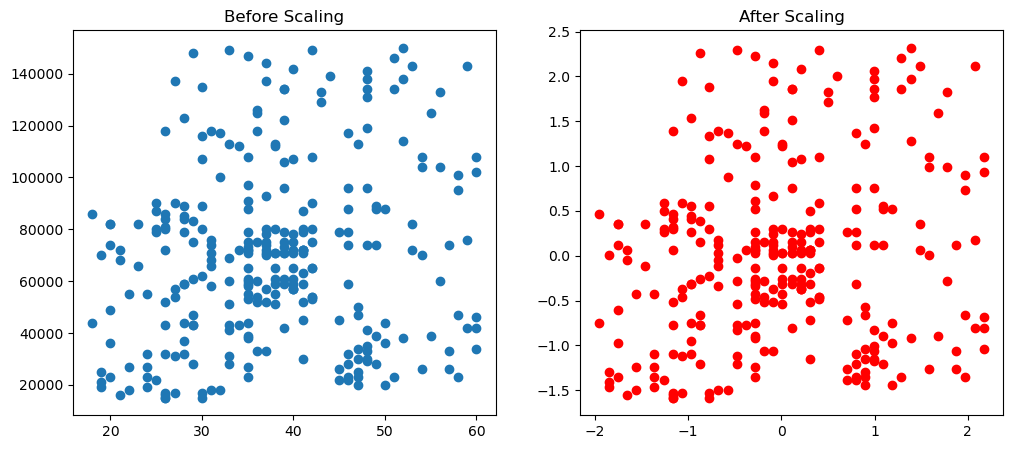

In [18]:
fig , (ax1, ax2) = plt.subplots(ncols=2 , figsize=(12 , 5))

ax1.scatter(X_train["Age"] ,X_train["EstimatedSalary"] )
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"] ,X_train_scaled["EstimatedSalary"] ,color = 'red')
ax2.set_title("After Scaling")


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaco

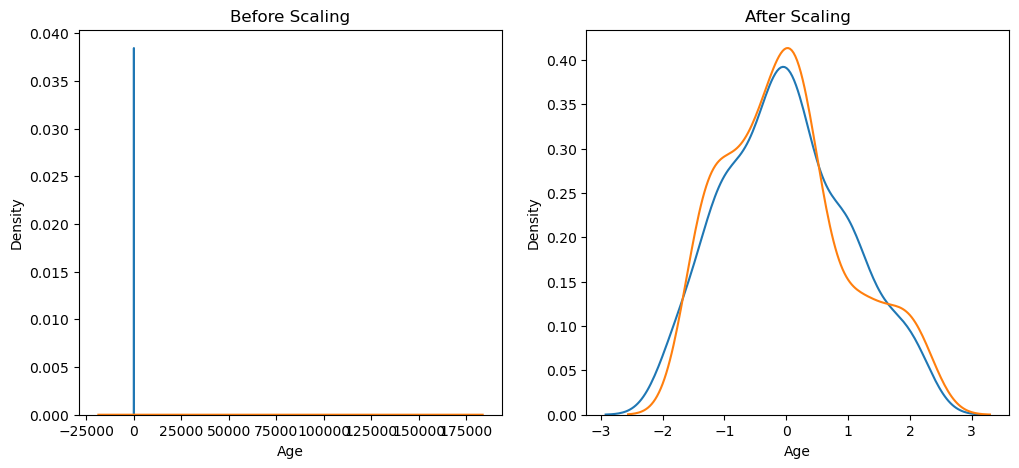

In [19]:
fig , (ax1, ax2) = plt.subplots(ncols=2 , figsize=(12 , 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"] , ax = ax1)
sns.kdeplot(X_train["EstimatedSalary"] , ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"] , ax = ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"] , ax = ax2)

plt.show()

## Why scaling is important?


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(X_train , y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [27]:
acc = accuracy_score(y_test , y_pred)
acc_scaled = accuracy_score(y_test , y_pred_scaled)

In [28]:
print("Accuracy without scaled:{}".format(acc))
print("Accuracy with scaled:{}".format(acc_scaled))

Accuracy without scaled:0.6583333333333333
Accuracy with scaled:0.8666666666666667


### As we can see here that there is a large difference between the accuracy of scaled dataset and without scaled dataset

### There is also some algorithms in which there is no effect of standardization like Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [30]:
dt.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

In [31]:
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [32]:
acc_dt = accuracy_score(y_test , y_pred_dt)
acc_scaled_dt = accuracy_score(y_test , y_pred_scaled_dt)

In [33]:
print("Accuracy without scaled:{}".format(acc_dt))
print("Accuracy with scaled:{}".format(acc_scaled_dt))

Accuracy without scaled:0.875
Accuracy with scaled:0.875


## Effect of outlier in the dataset in standardization

In [ ]:
df = df.append(pd.DataFrame({'Age':[5,90,95] , 'EstimatedSalary':[1000,25000,35000] , 'Purchased':[0,1,1]}) , ignore_index = True)

In [48]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95] , 'EstimatedSalary':[1000,25000,35000] , 'Purchased':[0,1,1]})], ignore_index=True)

In [49]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,25000,1


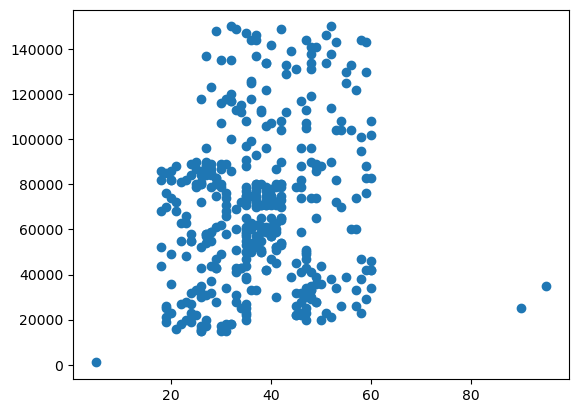

In [51]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop("Purchased" , axis = 1) , df["Purchased"] , test_size = 0.3, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler for learning the parameters and caluclating the mean for both the columns
scaler.fit(X_train)

#transform the X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

Text(0.5, 1.0, 'After Scaling')

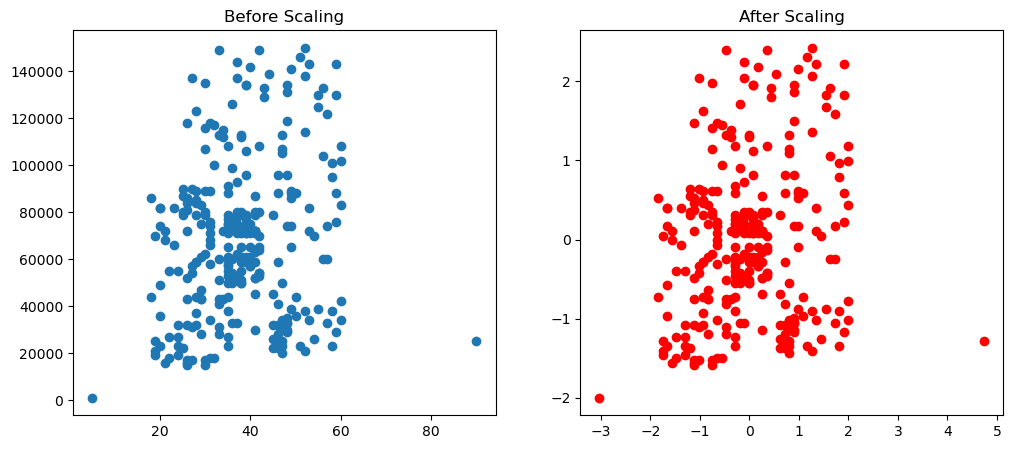

In [55]:
fig , (ax1, ax2) = plt.subplots(ncols=2 , figsize=(12 , 5))

ax1.scatter(X_train["Age"] ,X_train["EstimatedSalary"] )
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"] ,X_train_scaled["EstimatedSalary"] ,color = 'red')
ax2.set_title("After Scaling")


## As we can see that after doing standardization there is no effect in the outliers it means we have to handle the outliers after doing the standardization.